In [1]:
import numpy as np

from euler import Euler

In [2]:
def sod(g, v, gamma, U):
    
    # setup initial conditions -- this is Sod's problem
    rho_l = 1.0
    u_l = 0.0
    p_l = 1.0
    rho_r = 0.125
    u_r = 0.0
    p_r = 0.1

    idx_l = g.x < 0.5
    idx_r = g.x >= 0.5

    U[idx_l, v.urho] = rho_l
    U[idx_l, v.umx] =  rho_l * u_l
    U[idx_l, v.uener] = p_l/(gamma - 1.0) + 0.5 * rho_l * u_l**2

    U[idx_r, v.urho] = rho_r
    U[idx_r, v.umx] =  rho_r * u_r
    U[idx_r, v.uener] = p_r/(gamma - 1.0) + 0.5 * rho_r * u_r**2

In [15]:
e = Euler(64, 0.5, init_cond=sod)
e.estimate_dt()
e.dt

0.006602767615066536

In [16]:
q_left, q_right = e.interface_states()
flux = e.compute_fluxes(q_left, q_right)
flux[:, 0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39539107, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [17]:
#e.advance_step()
#e.U

In [18]:
e.evolve(0.2)

istep=1, self.t=0.006602767615066536, self.dt=0.006602767615066536
istep=2, self.t=0.010649087465369966, self.dt=0.004046319850303431
istep=3, self.t=0.014446018356594426, self.dt=0.00379693089122446
istep=4, self.t=0.018150551916040977, self.dt=0.0037045335594465515
istep=5, self.t=0.02187458255715053, self.dt=0.0037240306411095545
istep=6, self.t=0.02558046361200633, self.dt=0.003705881054855798
istep=7, self.t=0.029292507172663292, self.dt=0.003712043560656965
istep=8, self.t=0.03290281379503724, self.dt=0.003610306622373946
istep=9, self.t=0.03650318900603971, self.dt=0.003600375211002467
istep=10, self.t=0.04015364494104173, self.dt=0.0036504559350020215
istep=11, self.t=0.043703135541396355, self.dt=0.0035494906003546234
istep=12, self.t=0.047285410542382965, self.dt=0.0035822750009866064
istep=13, self.t=0.050833506346764715, self.dt=0.0035480958043817503
istep=14, self.t=0.05436844212451565, self.dt=0.0035349357777509386
istep=15, self.t=0.057931026758164424, self.dt=0.00356258

In [19]:
import matplotlib.pyplot as plt

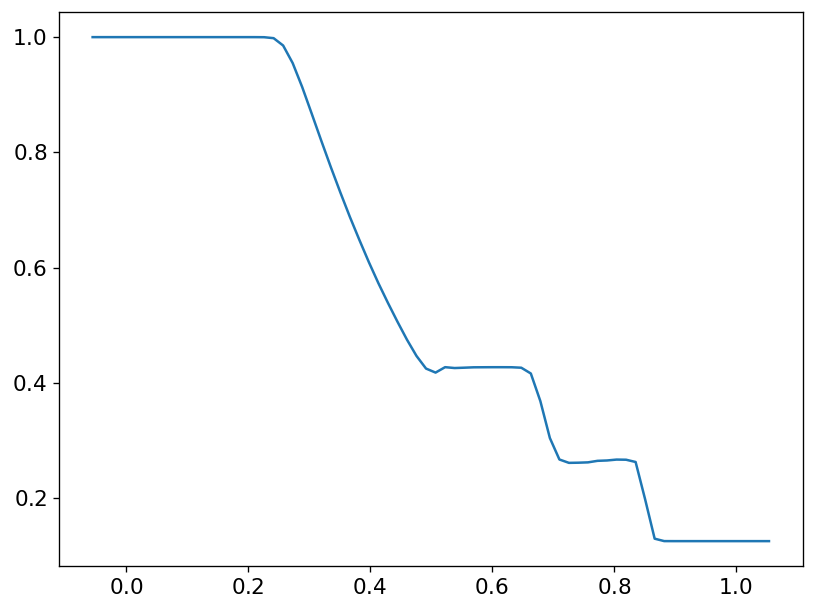

In [20]:
fig, ax = plt.subplots()
ax.plot(e.grid.x, e.U[:, 0])